<a href="https://colab.research.google.com/github/achmaulanaa/imdb-llm-capstone/blob/main/IMDB_Review_Achmad_Maulana_SDI_Data_Session_3_(18_September).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#installing dependencies env

!pip install replicate langchain_community pandas scikit-learn

In [60]:
from google.colab import userdata
import os

from sklearn.metrics import accuracy_score
from langchain_community.llms import Replicate

# ambil api_token dari secret
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

In [61]:
# Load IMDB dataset dari drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [62]:
# Jumlah review per label sentiment
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


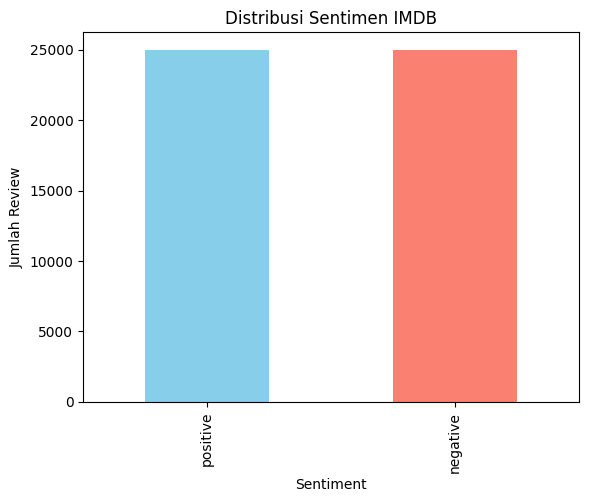

In [63]:
import matplotlib.pyplot as plt

# Mengitung distribusi label
df['sentiment'].value_counts().plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    title="Distribusi Sentimen IMDB"
)

plt.xlabel("Sentiment")
plt.ylabel("Jumlah Review")
plt.show()


In [64]:
# Get the llm
llm = Replicate(model="ibm-granite/granite-3.3-8b-instruct")

In [65]:
# Ambil sample
sample_df = df.sample(50, random_state=42).reset_index(drop=True)

In [69]:
results = []
for review in sample_df['review'][:5]:
    prompt = f"""
    Classify the sentiment of the following movie review as either "positive" or "negative".
    Respond with only one word: positive or negative.

    Review: {review}
    """
    output = llm.invoke(prompt).strip().lower()
    print("Review:", review[:80], "...")
    print("Predicted:", output)
    print("---")

Review: I really liked this Summerslam due to the look of the arena, the curtains and ju ...
Predicted: positive
---
Review: Not many television shows appeal to quite as many different kinds of fans like F ...
Predicted: positive
---
Review: The film quickly gets to a major chase scene with ever increasing destruction. T ...
Predicted: negative
---
Review: Jane Austen would definitely approve of this one!<br /><br />Gwyneth Paltrow doe ...
Predicted: positive
---
Review: Expectations were somewhat high for me when I went to see this movie, after all  ...
Predicted: negative
---


In [67]:
results = []

for review in sample_df['review'][:50]:  # ambil 50 review pertama
    prompt = f"""
    Classify the sentiment of the following movie review as either "positive" or "negative".
    Respond with only one word: positive or negative.

    Review: {review}
    """
    output = llm.invoke(prompt).strip().lower()
    results.append(output)

# Tambahkan ke dataframe
sample_df['predicted_sentiment'] = results

from sklearn.metrics import accuracy_score, confusion_matrix

# Akurasi
accuracy = accuracy_score(sample_df['sentiment'], sample_df['predicted_sentiment'])
print("Akurasi:", accuracy)

# Confusion Matrix
cm = confusion_matrix(sample_df['sentiment'], sample_df['predicted_sentiment'])
print("Confusion Matrix:\n", cm)


Akurasi: 0.9
Confusion Matrix:
 [[ 0  0  0  0]
 [ 0  0  0  0]
 [ 0  0 20  0]
 [ 1  1  3 25]]


Testing Another Prompt

In [68]:
prompts = [
    """I have 50,000 IMDB movie reviews, each labeled as positive or negative.
    Explain why it is important to check if the dataset is balanced between the two classes before training a sentiment classifier.""",

    """The IMDB dataset contains reviews with different lengths, writing styles, and tones.
    Explain how this diversity can influence the performance of a sentiment analysis model.""",

    """Why is it important to split the IMDB dataset into training and testing sets when building a sentiment classification model?
    Explain in simple terms as if you are teaching a beginner.""",

    """What are some challenges that a language model might face when analyzing IMDB reviews for sentiment?
    For example, consider sarcasm, mixed opinions, or cultural references.""",

    """If a streaming company analyzes the IMDB reviews dataset, what business insights could they gain?
    Provide examples of how sentiment analysis could help improve movies, recommendations, or customer satisfaction."""
]

for i, p in enumerate(prompts, 1):
    print(f"Prompt {i}:")
    print(p)
    print("\n Response:")
    output = llm.invoke(p)
    print(output)
    print("="*100, "\n")


Prompt 1:
I have 50,000 IMDB movie reviews, each labeled as positive or negative.
    Explain why it is important to check if the dataset is balanced between the two classes before training a sentiment classifier.

 Response:
1. Model Performance: An imbalanced dataset can lead to a model that is biased towards the majority class, resulting in poor performance on the minority class. In this case, if the dataset has significantly more negative reviews than positive ones, the model might become very accurate at predicting negative sentiments but fail to correctly classify positive reviews.

2. Evaluation Metrics: Imbalanced datasets require different evaluation metrics than balanced ones. Accuracy alone can be misleading, as a model can achieve high accuracy by simply predicting the majority class. Instead, metrics like Precision, Recall, F1-score, or Area Under the ROC Curve (AUC-ROC) should be used to evaluate the model's performance on both classes.

3. Overfitting: A model trained on